In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader,TensorDataset

## Load Dataset ##

In [2]:
train = datasets.MNIST(root = '/home/aminul/data',train = True, transform = transforms.ToTensor(), download = False)
test = datasets.MNIST(root = '/home/aminul/data',train = False, transform = transforms.ToTensor(), download = False)

In [3]:
train_loader = DataLoader(train,100,True)
test_loader = DataLoader(test,100,False)

## CNN Classifier ##

In [4]:
class CNN(nn.Module):
    def __init__(self,):
        super(CNN,self).__init__()
        
        ##defining layers
        
        self.kernel_size = 3
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=self.kernel_size)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12, kernel_size=self.kernel_size)
        
        self.fc1 = nn.Linear(12*5*5, 100)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),kernel_size=2,stride=2)
        
        x = F.max_pool2d(F.relu(self.conv2(x)),kernel_size=2,stride=2)

        
        x = F.relu(self.fc1(x.reshape(-1,12*5*5)))
        
        x = self.fc2(x)
        
        return x

In [5]:
class CNN_tanh(nn.Module):
    def __init__(self,):
        super(CNN_tanh,self).__init__()
        
        ##defining layers
        
        self.kernel_size = 5
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=self.kernel_size)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12, kernel_size=self.kernel_size)
        
        self.fc1 = nn.Linear(12*4*4, 100)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self,x):
        x = F.max_pool2d(F.hardtanh(self.conv1(x)),kernel_size=2,stride=2)
        
        x = F.max_pool2d(F.hardtanh(self.conv2(x)),kernel_size=2,stride=2)

        
        x = F.hardtanh(self.fc1(x.reshape(-1,12*4*4)))
        
        x = self.fc2(x)
        
        return x

In [6]:
class CNN_7(nn.Module):
    def __init__(self,):
        super(CNN_7,self).__init__()
        
        ##defining layers
        
        self.kernel_size = 7
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=self.kernel_size)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12, kernel_size=self.kernel_size)
        
        self.fc1 = nn.Linear(12*2*2, 100)
        self.fc2 = nn.Linear(100, 10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),kernel_size=2,stride=2)
        
        x = F.max_pool2d(F.relu(self.conv2(x)),kernel_size=2,stride=2)

        
        x = F.relu(self.fc1(x.reshape(-1,12*2*2)))
        
        x = self.fc2(x)
        
        return x

In [7]:
def train(model,train_loader,num_epochs,opt):
    loss_list = []
    iteration_list = []
    accuracy_list = []

    for epoch in range(num_epochs):
        total_loss = 0
        total_correct = 0
        total_data = 0
        loss = 0
        for i, (images, labels) in enumerate(train_loader):

            output = model(images)
            loss = criterion(output,labels)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_data += labels.size(0)
            total_loss += loss.item()
            _,p = torch.max(output.data,dim =1)
            total_correct += (p == labels).sum().item()

        print("Training: epoch: [{}/{}] Loss: [{:.2f}] Accuracy [{:.2f}]".format(epoch+1,num_epochs,
                                                                                 total_loss/len(train_loader),total_correct*100/total_data)) 
        loss_list.append(total_loss)
        iteration_list.append(epoch)
        accuracy_list.append(total_correct*100/total_data)
        
    return iteration_list,loss_list,accuracy_list

In [8]:
def test(model,test_loader):
    model.eval()
    with torch.no_grad():
        print("======================================================")
        print("TESTING")
        print("======================================================")
        total_loss = 0
        total_correct = 0
        total_data = 0
        for images, labels in test_loader:
            
            output = model(images)
            total_loss = criterion(output,labels)

            total_data += labels.size(0)
            total_loss += total_loss.item()
            _,p = torch.max(output.data,dim =1)
            total_correct += (p == labels).sum().item()
        
        print("Testing: Loss: [{:.2f}] Accuracy [{:.2f}]".format(total_loss,total_correct*100/total_data)) 

In [9]:
def visualize(history):
    print("======================================================")
    plt.plot(history[0],history[1])
    plt.xlabel("Number of iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs Number of iteration")
    plt.show()

    # visualization accuracy 
    plt.plot(history[0],history[2],color = "red")
    plt.xlabel("Number of iteration")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Number of iteration")
    plt.show()

## Set the Parameters ##

In [10]:
input_size = 784
num_classes = 10
learning_rate = 0.01
num_epoch = 5

## 3x3 vs 7x7 Kernel Size##

In [11]:
criterion = nn.CrossEntropyLoss()

model1 = CNN()

opt_1 = torch.optim.SGD(model1.parameters(),lr=learning_rate)

model2 = CNN_7()

opt_2 = torch.optim.SGD(model2.parameters(),lr=learning_rate)

Training: epoch: [1/5] Loss: [2.23] Accuracy [31.59]
Training: epoch: [2/5] Loss: [0.65] Accuracy [83.41]
Training: epoch: [3/5] Loss: [0.34] Accuracy [89.77]
Training: epoch: [4/5] Loss: [0.26] Accuracy [92.10]
Training: epoch: [5/5] Loss: [0.21] Accuracy [93.80]
TESTING
Testing: Loss: [0.53] Accuracy [94.94]


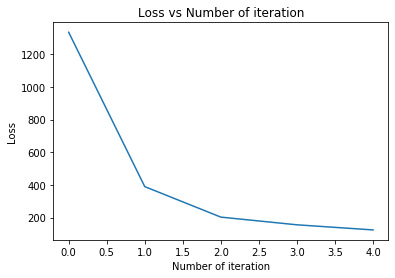

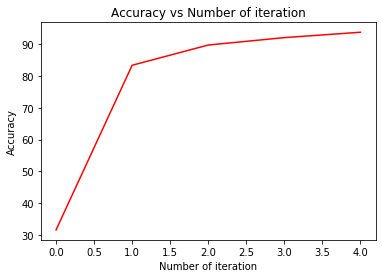

In [12]:
history = train(model1,train_loader,num_epoch,opt_1)
test(model1,test_loader)
visualize(history)

Training: epoch: [1/5] Loss: [2.29] Accuracy [18.80]
Training: epoch: [2/5] Loss: [1.30] Accuracy [65.58]
Training: epoch: [3/5] Loss: [0.41] Accuracy [87.89]
Training: epoch: [4/5] Loss: [0.30] Accuracy [91.12]
Training: epoch: [5/5] Loss: [0.24] Accuracy [92.71]
TESTING
Testing: Loss: [0.62] Accuracy [93.98]


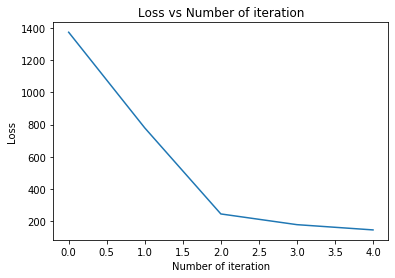

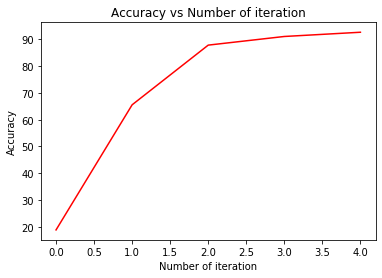

In [13]:
history = train(model2,train_loader,num_epoch,opt_2)
test(model2,test_loader)
visualize(history)

## SGD vs ADAM Optimizer ##

In [14]:
criterion = nn.CrossEntropyLoss()

model3 = CNN()

opt_1 = torch.optim.Adam(model3.parameters(),lr=learning_rate)

model4 = CNN()

opt_2 = torch.optim.SGD(model4.parameters(),lr=learning_rate)

Training: epoch: [1/5] Loss: [0.18] Accuracy [94.22]
Training: epoch: [2/5] Loss: [0.07] Accuracy [97.93]
Training: epoch: [3/5] Loss: [0.05] Accuracy [98.36]
Training: epoch: [4/5] Loss: [0.04] Accuracy [98.62]
Training: epoch: [5/5] Loss: [0.04] Accuracy [98.64]
TESTING
Testing: Loss: [0.01] Accuracy [98.36]


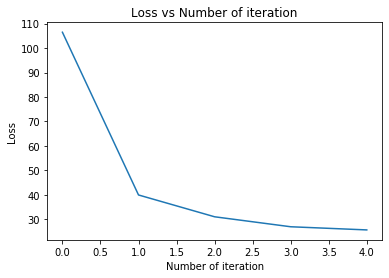

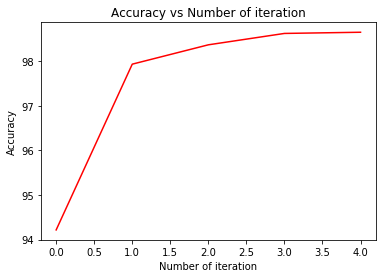

In [15]:
history = train(model3,train_loader,num_epoch,opt_1)
test(model3,test_loader)
visualize(history)

Training: epoch: [1/5] Loss: [2.30] Accuracy [10.62]
Training: epoch: [2/5] Loss: [2.29] Accuracy [13.96]
Training: epoch: [3/5] Loss: [1.35] Accuracy [66.86]
Training: epoch: [4/5] Loss: [0.39] Accuracy [88.34]
Training: epoch: [5/5] Loss: [0.29] Accuracy [91.22]
TESTING
Testing: Loss: [0.82] Accuracy [93.07]


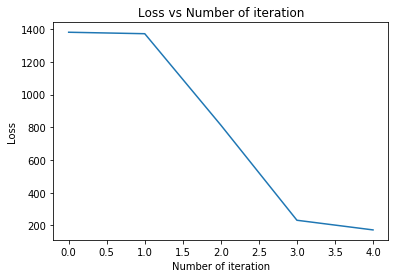

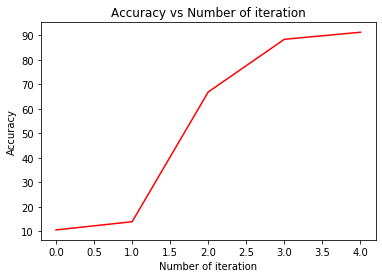

In [16]:
history = train(model4,train_loader,num_epoch,opt_2)
test(model4,test_loader)
visualize(history)

## ReLU vs Tanh activity function ##

In [17]:
criterion = nn.CrossEntropyLoss()

model5 = CNN()

opt_1 = torch.optim.Adam(model5.parameters(),lr=learning_rate)

model6 = CNN_tanh()

opt_2 = torch.optim.Adam(model6.parameters(),lr=learning_rate)

Training: epoch: [1/5] Loss: [0.19] Accuracy [94.04]
Training: epoch: [2/5] Loss: [0.06] Accuracy [97.98]
Training: epoch: [3/5] Loss: [0.05] Accuracy [98.41]
Training: epoch: [4/5] Loss: [0.05] Accuracy [98.47]
Training: epoch: [5/5] Loss: [0.04] Accuracy [98.66]
TESTING
Testing: Loss: [0.01] Accuracy [97.93]


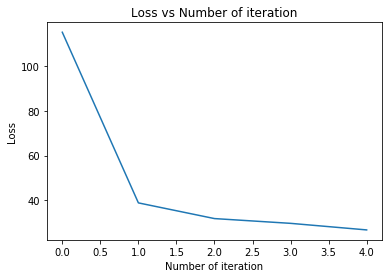

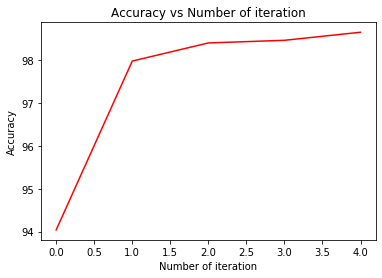

In [18]:
history = train(model5,train_loader,num_epoch,opt_1)
test(model5,test_loader)
visualize(history)

Training: epoch: [1/5] Loss: [0.18] Accuracy [94.25]
Training: epoch: [2/5] Loss: [0.11] Accuracy [96.55]
Training: epoch: [3/5] Loss: [0.11] Accuracy [96.70]
Training: epoch: [4/5] Loss: [0.11] Accuracy [96.63]
Training: epoch: [5/5] Loss: [0.11] Accuracy [96.88]
TESTING
Testing: Loss: [0.19] Accuracy [96.88]


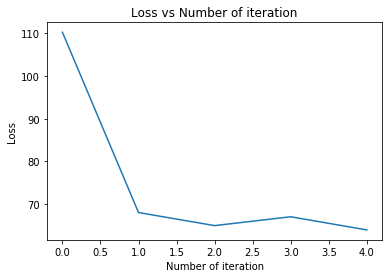

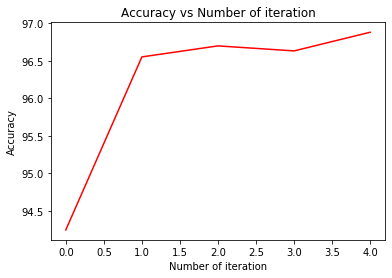

In [19]:
history = train(model6,train_loader,num_epoch,opt_2)
test(model6,test_loader)
visualize(history)